# HTW-Berlin - Informatik und Wirtschaft - Aktuelle Trends - Machine Learning: Evaluation Exercise

## Table of Contents

* [Introduction](#Introduction)
  * [Required Knowledge](#Required-Knowledge)
  * [Required Python Modules](#Required-Python-Modules)


* [Evaluation](#Evaluation)
  * [Implementation of Logistic Hypothesis](#Implementation-of-Logistic-Hypothesis)
  * [Classify Datasets](#Classify-Datasets)
  * [Exercise: Accuracy](#Exercise:-Accuracy)
  * [Exercise: TP, FP, TN, FN](#Exercise:-TP,-FP,-TN,-FN)
  * [Exercise: Precision and Recall](#Exercise:-Precision-and-Recall)
  * [Exercise: F-Score](#Exercise:-F-Score)


* [Summary and Outlook](#Summary-and-Outlook)
* [Licenses](#Licenses)

## Introduction

Goal of this exercise is to evaluation scores for a classification task in Python. You can use the Python standard library and math functions from numpy. This notebook guides you through the implementation process.

This notebooks implements tests using `assert` or `np.testing.assert_almost_equal`. If you run the corresponding notebook cell and no output appears, the test has passed. Otherwise an exception is raised.

**General Hint:**

If you have problems with the implementation (e.g. you don't know how to call a certain function or you don't know how to loop through the dataset), make use of the interactive nature of the notebook. You can at all times add new cells to the notebook to inspect defined variables or to try small code snippets.

### Required Knowledge

This exercise is part of the course "Aktuelle Trends der Informations- und Kommunikationstechnik". The fundamentals of evaluation metrics are taught in class.

* The PDF slides used in class are [available](../../../../../slides/courses/htw-berlin/informatik-und-wirtschaft/aktuelle-trends/evaluation.pdf) in the educational-materials repository.

### Required Python Modules

In [1]:
import os
import socket
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from deep_teaching_commons.data.fundamentals.iris import Iris

/home/christoph/.local/share/virtualenvs/educational-materials-Ei5qxOuI/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/christoph/.local/share/virtualenvs/educational-materials-Ei5qxOuI/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Required Data

In [2]:
base_data_dir = os.path.expanduser('~/deep.TEACHING/data')
dm = Iris(base_data_dir=base_data_dir)  # data manager
iris = dm.dataframe()

auto download is active, attempting download
data directory already exists, no download required


In [3]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
df_reduced = iris.query('species == "Iris-versicolor" | species == "Iris-virginica"')
df_reduced.head()

sepal_length  sepal_width  petal_length  petal_width          species
50           7.0          3.2           4.7          1.4  Iris-versicolor
51           6.4          3.2           4.5          1.5  Iris-versicolor
52           6.9          3.1           4.9          1.5  Iris-versicolor
53           5.5          2.3           4.0          1.3  Iris-versicolor
54           6.5          2.8           4.6          1.5  Iris-versicolor

In [5]:
X = df_reduced[['petal_width', 'petal_length']].values
Y = df_reduced['species'].replace({'Iris-versicolor': 0, 'Iris-virginica': 1}).values

In [6]:
X[:5]

array([[1.4, 4.7],
       [1.5, 4.5],
       [1.5, 4.9],
       [1.3, 4. ],
       [1.5, 4.6]])

In [7]:
Y[:5]

array([0, 0, 0, 0, 0])

In [8]:
X.shape, Y.shape

((100, 2), (100,))

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled[:5]

array([[-0.65303909, -0.25077906],
       [-0.41643072, -0.49425387],
       [-0.41643072, -0.00730424],
       [-0.88964745, -1.10294091],
       [-0.41643072, -0.37251647]])

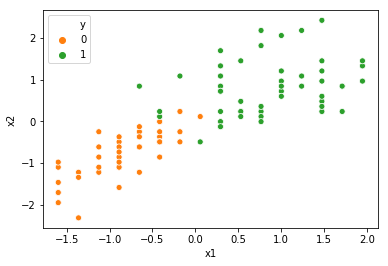

In [11]:
# plot data
cp = sns.color_palette()
df_scaled = pd.DataFrame(X_scaled, columns=['x1', 'x2'])
df_scaled['y'] = Y
sns.scatterplot(data=df_scaled, x='x1', y='x2', hue='y', palette=cp[1:3]);

In [12]:
# split data for training and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, stratify=Y, test_size=0.2, random_state=42
)

In [13]:
train_classes = dict(zip(*np.unique(Y_train, return_counts=True)))
test_classes = dict(zip(*np.unique(Y_test, return_counts=True)))

train_classes, test_classes

({0: 40, 1: 40}, {0: 10, 1: 10})

## Implementation of Logistic Hypothesis

This implementation was part of the last notebook "Exercise: Logistic Regression".

In [14]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [15]:
def make_logistic_hypothesis(w1, w2, b):
    def logistic_hypothesis(x1, x2):
        return sigmoid(x1 * w1 + x2 * w2 + b)
    
    return logistic_hypothesis

In [16]:
def make_decision_boundary(w1, w2, b, threshold):
    def decision_boundary(x1):
        return (np.log(threshold / (1 - threshold)) - x1*w1 - b) * (1 / w2)
    
    return decision_boundary

In [17]:
def plot_boundary(df, decision_boundary):
    sns.scatterplot(data=df, x='x1', y='x2', hue='y', palette=sns.color_palette()[1:3])
    
    spacing = np.linspace(df['x1'].min(), df['x1'].max(), 10)
    boundary_values = np.array([decision_boundary(x1) for x1 in spacing])

    plt.plot(spacing, boundary_values, label='boundary')

In [18]:
def make_classify(w1, w2, b, threshold):
    h = make_logistic_hypothesis(w1, w2, b)
    
    def classify(x1, x2):
        return 1 if h(x1, x2) > threshold else 0
    
    return classify

In [19]:
# Choose some mediocre values, to demonstrate metrics
w1, w2, b = 3.6962765211562245, 2.548083316850051, 0.01089234547433182

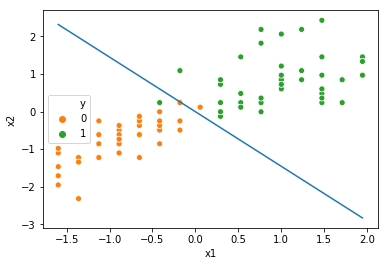

In [20]:
# plot training data
df_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
df_train['y'] = Y_train
plot_boundary(df_train, make_decision_boundary(w1, w2, b, 0.5))

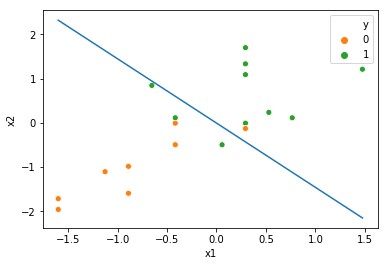

In [21]:
# plot test data
df_test = pd.DataFrame(X_test, columns=['x1', 'x2'])
df_test['y'] = Y_test
plot_boundary(df_test, make_decision_boundary(w1, w2, b, 0.5))

In [22]:
# create classifier
classify = make_classify(w1, w2, b, 0.5)
classify(-1, -1)

0

## Classify Datasets

In [23]:
C_train = np.array([classify(x1, x2) for x1, x2 in X_train])
C_test = np.array([classify(x1, x2) for x1, x2 in X_test])

In [24]:
C_train[:5]

array([0, 1, 1, 1, 1])

In [25]:
C_test[:5]

array([1, 1, 1, 1, 0])

In [26]:
C_train.shape, C_test.shape

((80,), (20,))

## Exercise: Accuracy

Accuracy is defined as

$$
accuracy = \frac{T}{T + F}
$$

where $T$ is the number of true classifications and $F$ is the number of false classifications on a dataset.

Implement the function `accuracy` below.

In [27]:
def accuracy(C, Y):
    raise NotImplementedError('implement this function')

In [29]:
train_accuracy = accuracy(C_train, Y_train)
train_accuracy

0.975

In [30]:
test_accuracy = accuracy(C_test, Y_test)
test_accuracy

0.8

In [31]:
np.testing.assert_almost_equal(accuracy(C_train, Y_train), 0.975)
np.testing.assert_almost_equal(accuracy(C_test, Y_test), 0.8)

## Exercise: TP, FP, TN, FN

#### True Positive (TP)

Number of **true** (T) classifications where the classification result is class **1** (P) bestimmt wurden.

#### False Positive (FP)

Number of **false** (F) classifications where the classification result is class **1** (P) bestimmt wurden.

#### True Negative (TN)

Number of **true** (T) classifications where the classification result is class **0** (N) bestimmt wurden.

#### False Negative (FN)

Number of **false** (F) classifications where the classification result is class **0** (N) bestimmt wurden.


Implement the function `tp_fp_tn_fn` to calculate values for TP, FP, FN, FN on a dataset.

In [32]:
def tp_fp_tn_fn(C, Y):
    raise NotImplementedError('implement this function')
    
    tp, fp, tn, fn = 0, 0, 0, 0
                
    return tp, fp, tn, fn

In [34]:
train_tp, train_fp, train_tn, train_fn = tp_fp_tn_fn(C_train, Y_train)
train_tp, train_fp, train_tn, train_fn

(39, 1, 39, 1)

In [35]:
test_tp, test_fp, test_tn, test_fn = tp_fp_tn_fn(C_test, Y_test)
test_tp, test_fp, test_tn, test_fn

(7, 1, 9, 3)

In [36]:
np.testing.assert_almost_equal(tp_fp_tn_fn(C_train, Y_train), (39, 1, 39, 1))
np.testing.assert_almost_equal(tp_fp_tn_fn(C_test, Y_test), (7, 1, 9, 3))

# Exercise: Precision and Recall

Precision and recall are defined as follows:

$$
precision = \frac{TP}{TP+FP}
$$

$$
recall = \frac{TP}{TP+FN}
$$

Implement a function `precision_recall` to calculate precision and recall.

In [37]:
def precision_recall(tp, fp, fn):
    raise NotImplementedError('implement this function')
    
    precision = None
    recall = None
    
    return precision, recall

In [39]:
train_precision, train_recall = precision_recall(train_tp, train_fp, train_fn)
train_precision, train_recall

(0.975, 0.975)

In [40]:
test_precision, test_recall = precision_recall(test_tp, test_fp, test_fn)
test_precision, test_recall

(0.875, 0.7)

In [41]:
np.testing.assert_almost_equal(precision_recall(39, 1, 1), (0.975, 0.975))
np.testing.assert_almost_equal(precision_recall(7, 1, 3), (0.875, 0.7))

# Exercise: F-Score

The f-score metric is defined as follows:

$$
F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}
$$

Implement a function `f_score` to calculate the value.

In [42]:
def f_score(precision, recall, beta):
    raise NotImplementedError('implement this function')

In [44]:
train_f1_score = f_score(train_precision, train_recall, 1)
train_f1_score

0.975

In [45]:
train_f05_score = f_score(train_precision, train_recall, 0.5)
train_f05_score

0.975

In [46]:
test_f1_score = f_score(test_precision, test_recall, 1)
test_f1_score

0.7777777777777777

In [47]:
test_f05_score = f_score(test_precision, test_recall, 0.5)
test_f05_score

0.8333333333333334

In [48]:
np.testing.assert_almost_equal(f_score(train_precision, train_recall, 1), 0.975)
np.testing.assert_almost_equal(f_score(train_precision, train_recall, 0.5), 0.975)
np.testing.assert_almost_equal(f_score(test_precision, test_recall, 1), 0.7777777777777777)
np.testing.assert_almost_equal(f_score(test_precision, test_recall, 0.5), 0.8333333333333334)

## Summary and Outlook

You have learned how to implement evaluation scores for a classification task.

This was the last part of the course. If you are interested in further topics, learn about vectorization, general forms of Linear and Logistic Regression with an arbitrary number of inputs and outputs, as well as Artifcial Neural Networks.

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g. images).*

HTW-Berlin - Informatik und Wirtschaft - Aktuelle Trends - Machine Learning: Evaluation Exercise<br/>
by [Christoph Jansen (deep.TEACHING - HTW Berlin)](https://www.htw-berlin.de/hochschule/personen/person/?eid=9225)<br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 Christoph Jansen

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.